### 학습목표
- 공부시간에 따른 성적데이터를 기반으로 선형회귀를 이해해보자
- 경사하강법의 개념을 이해하고 사용해보자!

In [1]:
# 성적데이터 생성을 위한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 성적데이터 생성
data = pd.DataFrame([[2, 20], [4, 40], [8, 80], [9, 90]], index=['자영', '다이', '준용', '예진'], columns=['시간', '성적'])
data

,시간,성적
자영,2,20
다이,4,40
준용,8,80
예진,9,90


### 평균제곱오차(MSE)가 최소가 되는 최적의 w, b를 찾는 방법
1. 수학 공식을 이용한 해석적 모델
2. 경사하강법을 이용한 모델

#### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression
- 단순 수학공식(MSE)을 이용해서 적은 계산으로 한 번에 최적의 선형함수(직선)를 찾는 방법
- 공식이 완벽하지 않아도 수정할 수 없다는 단점 ==> 규제를 접목하여 개선

In [3]:
# 모델 라이브러리 불러오기
from sklearn.linear_model import LinearRegression

In [4]:
# 1) 모델 객체 생성
linear_model = LinearRegression() # 별도의 하이퍼파라미터를 가지지 않음
linear_model

LinearRegression()

In [5]:
# 2) 모델 학습
# 모델명.fit(문제 데이터, 답 데이터)
linear_model.fit(data[['시간']], data['성적'])
# 문제데이터 -> 반드시 2차원
# 답데이터 -> 1차원

LinearRegression()

#### 가중치와 절편 값 구하기
- y = wx + b(1개의 문제)

In [6]:
# 모델이 예측한 가중치(w), 절편(b) 확인
# y = wx + b -> 우리가 예상한 그래프 y = 10x + 0

# w : 가중치, 기울기
display('기울기(가중치) : ', linear_model.coef_) # 10

# b : 절편(편향)
display('절편(편향) : ', linear_model.intercept_) # 0에 수렴

'기울기(가중치) : '

array([10.])

'절편(편향) : '

7.105427357601002e-15

In [7]:
# 3) 모델 예측
# 문제데이터 -> 2차원 => [[]] 써서 2차원으로 변환!
linear_model.predict([[7]]) # 70점으로 예측

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

### 2. 경사하강법
- 선형모델 MSE가 최소가 되는 w(가중치), b(절편)을 찾는 방법
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법
- 찾고자하는 값(w,b)에 변화에 따른 비용함수(cost)값의 변화 그래프를 출력

- 가중치 변화에 따른 MSE 변화 그래프 확인

In [8]:
# 예측값(가설함수) 정의
def h(w, x) :
    return w * x + 0

In [11]:
# 비용함수(MSE) 정의
# 오차 == (예측값 - 실제값)

# data : 예측할 X값(문제)
# target : 답 데이터
# weight : 가중치
def cost(data, target, weight) :
    # 예측
    y_pre = h(weight, data)
    # 평균제곱오차(MSE) == (오차 ** 2).mean()
    mse = ((y_pre - target) ** 2).mean()
    return mse

In [ ]:
# 가중치(w)에 따른 오차값(mse) 확인
# 예측한 가중치가 10일 경우
# y = 10 * X + 0
cost(data['시간'], data['성적'], 10)

0.0

In [14]:
# 예측한 가중치가 5일 경우
cost(data['시간'], data['성적'], 5)

1031.25

In [15]:
# 예측한 가중치가 15일 경우
cost(data['시간'], data['성적'], 15)

1031.25

In [ ]:
# 가중치(w)변화에 따른 비용함수(MSE)의 변화를 그래프로 그려보기
cost_list = [] # 가중치 변화에 따른 평균제곱오차값(MSE)을 담아주는 리스트

for w in range(1, 21) : # 1 ~ 20까지 가중치 변화하는 동안에 오차 확인
    mse = cost(data['시간'], data['성적'], w) # 비용함수(오차, MSE)
    cost_list.append(mse)

cost_list


[3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0]

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_11964\2129482359.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


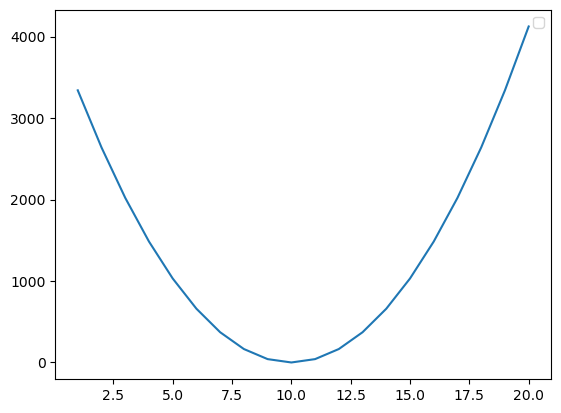

In [ ]:
# 비용함수(MSE) 그래프로 그리기
plt.plot(range(1, 21), cost_list)




### SGDRegressor(Stochastic Gradient Desecent, 확률적 경사 하강법)
- 사이킷런에서 구성해놓은 경사하강법을 활용한 선형회귀모델
- 경사하강법을 이용하는 모델

In [21]:
# 모델 라이브러리 호출
from sklearn.linear_model import SGDRegressor

In [22]:
# 1) 모델 생성 및 하이퍼파라미터 설정
sgd_model = SGDRegressor()
sgd_model

SGDRegressor()

In [ ]:
# 2) 모델 학습
sgd_model.fit(data[['시간']], data['성적']) # 문제는 2차원

SGDRegressor()